In [109]:
import os
import pandas as pd
import seaborn as sns
import re
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt


pd.reset_option('display.max_colwidth')
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)


In [110]:


BASE_DIR = os.getcwd()
DATA_DIR = os.path.join(BASE_DIR, '../data')
df = pd.read_csv(os.path.join(DATA_DIR, 'filtered_data.csv'))

In [111]:
# 데이터 확인
print(df.head(10))

                    ID                             text  target
0  ynat-v1_train_01365  與.41-|스트트랙 $상b가속…"국| (한 좌석 남아I다       2
1  ynat-v1_train_01246            국B디!인 50(원#규/ 중^신청>피소       3
2  ynat-v1_train_00537  유엔 w.아4공습으로 1[일간 민간인 100명 이상 yZ       6
3  ynat-v1_train_02106        채널Ax인사_서 검5W착 의혹u기QF): 결정       3
4  ynat-v1_train_01052                     남x노X자s일 )구대T       2
5  ynat-v1_train_01586        대신證 아7레퍼시픽 신IXE경!rj …목d가↑       5
6  ynat-v1_train_00786  변",, 라건WQ떠오른 ]대성*현대모비< ?력 k표팀lY       1
7  ynat-v1_train_01559  케@U극c } s글랜드축구 러시아m 확0!p로베=아 제N       1
8  ynat-v1_train_01632   ~임 A국_허.찔렀다…H켓몬 Q 1풍C 초라A 한국종g       4
9  ynat-v1_train_01684        눈은 i여도 FD 못 속인다L청|의 진ez물D       4


In [112]:
df.describe()

,target
count,1800.000000
mean,3.015000
std,1.997858
min,0.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,6.000000


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      1800 non-null   object
 1   text    1800 non-null   object
 2   target  1800 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 42.3+ KB


In [114]:
# 아스키 코드 변환
df['text_ascii'] = df['text'].apply(lambda x: [ord(char) for char in x])

# # 최대 길이에 맞춰 패딩
# max_len = df['text_ascii'].apply(len).max()
# df['text_ascii_padded'] = df['text_ascii'].apply(lambda x: x + [0] * (max_len - len(x)))




In [151]:
# 한글, 한자, 공백(32), 그리고 8230을 제외하는 함수 적용
df['no_basic_word'] = df['text_ascii'].apply(
    lambda x: [ascii_code for ascii_code in x if ascii_code not in (32, 37, 46, 8230, 8595, 8593, 183, 8764) and not (
        (44032 <= ascii_code <= 55203) or  # 한글 음절 범위
        (19968 <= ascii_code <= 40959) or  # 한자 범위
        (48 <= ascii_code <= 57) or        # 숫자 범위
        (65 <= ascii_code <= 90)           # 영어 대문자 범위
    )]
)


In [152]:
# text_ascii 벡터의 평균을 계산하여 새로운 열 추가
df['no_basic_word_mean'] = df['no_basic_word'].apply(lambda x: sum(x) / len(x) if len(x) > 0 else 0)

In [153]:
# text_ascii 벡터의 평균을 계산하여 새로운 열 추가
df['no_basic_word_count'] = df['no_basic_word'].apply(lambda x: len(x))

In [154]:
# Sort by 'text_ascii_mean' in descending order
df = df.sort_values(by='no_basic_word_count', ascending=True)


In [155]:
# 'text_ascii_filtered' 열의 길이가 10 이하인 행을 제거
df = df[df['text_ascii'].apply(len) > 10].reset_index(drop=True)


In [161]:
# Filter out rows where 'no_basic_word_count' is 1 or less
df_over_one_char = df[df['no_basic_word_count'] > 1].reset_index(drop=True)

In [163]:
df_over_one_char.tail(1800)

,ID,text,target,text_ascii,no_basic_word,no_basic_word_mean,no_basic_word_count
0,ynat-v1_train_00258,초등학생들 경북도청 |들`,3,"[52488, 46321, 54617, 49373, 46308, 32, 44221, 48513, 46020, 52397, 32, 124, 46308, 96]","[124, 96]",110.000000,2
1,ynat-v1_train_02663,바레인 아랍의H봄 xU부 시위 시아파\지도자에C종신형,6,"[48148, 47112, 51064, 32, 50500, 46989, 51032, 72, 48388, 32, 120, 85, 48512, 32, 49884, 50948, 32, 49884, 50500, 54028, 92, 51648, 46020, 51088, 50640, 67, 51333, 49888, 54805]","[120, 92]",106.000000,2
2,ynat-v1_train_02143,셧다q에 줄T3 W리…방H2도 코로나 직격w,3,"[49511, 45796, 113, 50640, 32, 51460, 84, 51, 32, 87, 47532, 8230, 48169, 72, 50, 46020, 32, 53076, 47196, 45208, 32, 51649, 44201, 119]","[113, 119]",116.000000,2
3,ynat-v1_train_01616,금감원 이어 공정위까지…6부기관[사칭B악h메1 기승,3,"[44552, 44048, 50896, 32, 51060, 50612, 32, 44277, 51221, 50948, 44620, 51648, 8230, 54, 48512, 44592, 44288, 91, 49324, 52845, 66, 50501, 104, 47700, 49, 32, 44592, 49849]","[91, 104]",97.500000,2
4,ynat-v1_train_00595,아프리카 남수a서 부04간 폭g사태로 11명L사망,6,"[50500, 54532, 47532, 52852, 32, 45224, 49688, 97, 49436, 32, 48512, 48, 52, 44036, 32, 54253, 103, 49324, 53468, 47196, 32, 49, 49, 47749, 76, 49324, 47581]","[97, 103]",100.000000,2
5,ynat-v1_train_01745,네이버 아이n 도용 방지26&화,3,"[45348, 51060, 48260, 32, 50500, 51060, 110, 32, 46020, 50857, 32, 48169, 51648, 50, 54, 38, 54868]","[110, 38]",74.000000,2
6,ynat-v1_train_00188,"새누리 원내대표 CL 화|는,여소야대·계파",2,"[49352, 45572, 47532, 32, 50896, 45236, 45824, 54364, 32, 67, 76, 32, 54868, 124, 45716, 44, 50668, 49548, 50556, 45824, 183, 44228, 54028]","[124, 44]",84.000000,2
7,ynat-v1_train_02629,"올D 민주언론상에<SBS 삼성1관련""연속 보도",3,"[50732, 68, 32, 48124, 51452, 50616, 47200, 49345, 50640, 60, 83, 66, 83, 32, 49340, 49457, 49, 44288, 47144, 34, 50672, 49549, 32, 48372, 46020]","[60, 34]",47.000000,2
8,ynat-v1_train_02199,에콰도C t가7상 반대 j업으로 이U째B혼란…%50명 연행,6,"[50640, 53104, 46020, 67, 32, 116, 44032, 55, 49345, 32, 48152, 45824, 32, 106, 50629, 51004, 47196, 32, 51060, 85, 51704, 66, 54844, 46976, 8230, 37, 53, 48, 47749, 32, 50672, 54665]","[116, 106]",111.000000,2
9,ynat-v1_train_00922,그%픽 전세p급Hu 추이,5,"[44536, 37, 54589, 32, 51204, 49464, 112, 44553, 72, 117, 32, 52628, 51060]","[112, 117]",114.500000,2


In [55]:
# 'text_ascii_mean'을 기준으로 오름차순 정렬
df_sorted = df.sort_values(by='text_ascii_mean')

# 가장 작은 1000개 데이터를 제외하고 상위 1800개 선택
df_filtered = df_sorted.iloc[1000:2800][['ID', 'text', 'target']]

# 파일 저장
output_path = os.path.join(DATA_DIR, 'filtered_data.csv')
df_filtered.to_csv(output_path, index=False)


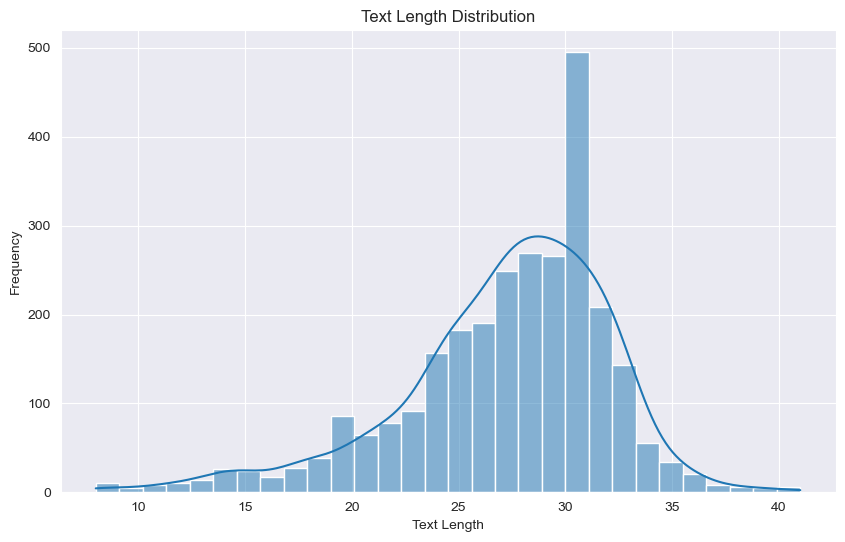

In [6]:
# 1. 텍스트 길이 분포
df['text_length'] = df['text'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

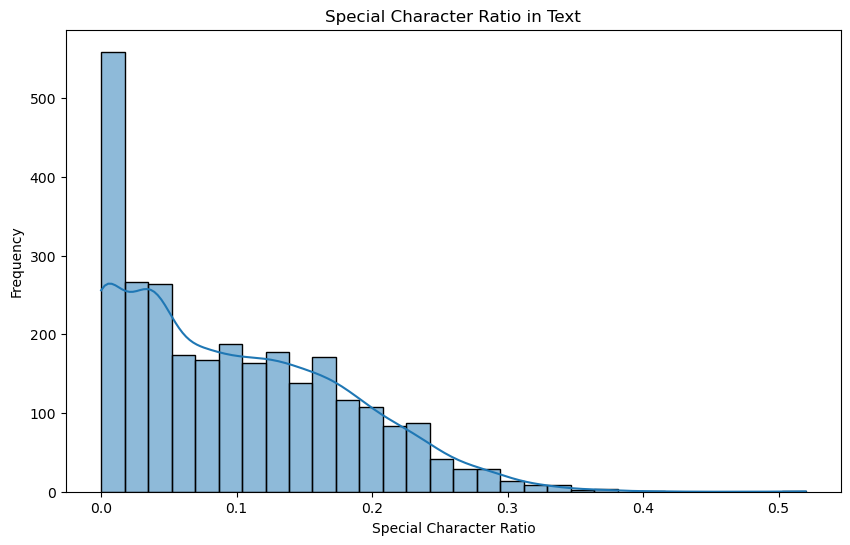

In [31]:
# 2. 텍스트 내 특수문자 비율
def calculate_special_char_ratio(text):
    special_chars = re.findall(r'[^a-zA-Z가-힣0-9\s]', text)  # 한글 및 숫자 제외
    return len(special_chars) / len(text) if len(text) > 0 else 0

data['special_char_ratio'] = data['text'].apply(calculate_special_char_ratio)

plt.figure(figsize=(10, 6))
sns.histplot(data['special_char_ratio'], bins=30, kde=True)
plt.title('Special Character Ratio in Text')
plt.xlabel('Special Character Ratio')
plt.ylabel('Frequency')
plt.show()


In [40]:
# 특수문자 비율에 따라 범주화
def categorize_special_char_ratio(ratio):
    if ratio < 0.05:
        return 'Low (<0.05)'
    elif 0.05 <= ratio < 0.1:
        return 'Medium (0.05-0.1)'
    else:
        return 'High (>=0.1)'
    

data['special_char_category'] = data['special_char_ratio'].apply(categorize_special_char_ratio)

    
# 각 범주별로 10개씩 샘플 출력
for category in ['Low (<0.05)', 'Medium (0.05-0.1)', 'High (>=0.1)']:
    print(f"\nCategory: {category}")
    sample_data = data[data['special_char_category'] == category].head(10)
    print(sample_data[['text', 'special_char_ratio']])


Category: Low (<0.05)
                              text  special_char_ratio
3    갤노트8 주말 27만대 개통…시장은 불법 보조금 얼룩            0.034483
6            프로야구~롯TKIAs광주 경기 y천취소            0.047619
9       듀얼심 아이폰 하반기 출시설 솔솔…알뜰폰 기대감            0.038462
11            NH투자 1월 옵션 만기일 매도 우세            0.000000
12        황총리 각 부처 비상대비태세 철저히 강구해야            0.000000
15  게시판 KISA 박민정 책임연구원 APTLD 이사 선출            0.000000
16  공사업체 협박에 분쟁해결 명목 돈 받은 언론인 집행유예            0.000000
17    월세 전환에 늘어나는 주거비 부담…작년 역대 최고치            0.035714
18                    개R전 연w정연H 작가            0.000000
19    페이스북 인터넷 드론 아퀼라 실물 첫 시험비행 성공            0.000000

Category: Medium (0.05-0.1)
                                  text  special_char_ratio
0     정i :파1 미사z KT( 이용기간 2e 단] Q분종U2보            0.093750
5       美성인 6명 중 1명꼴 배우자·연인 빚 떠안은 적 있다            0.066667
8       朴대통령 얼마나 많이 놀라셨어요…경주 지진현장 방문종합            0.066667
21        KIA I수단·팬nI께하는:호kQ4M족 한마5 S최            0.071429
23    아시안게임 목소리 높인 박항서 베트남이 일본 못 이길...          

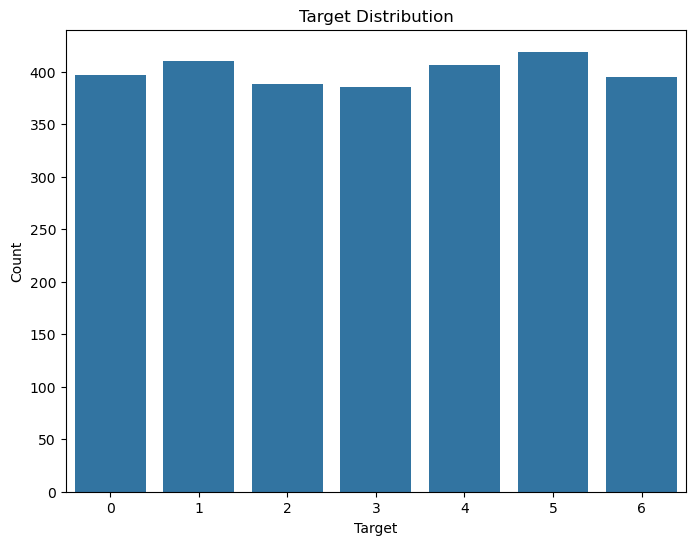

In [41]:

# 3. Target 분포
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='target')
plt.title('Target Distribution')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

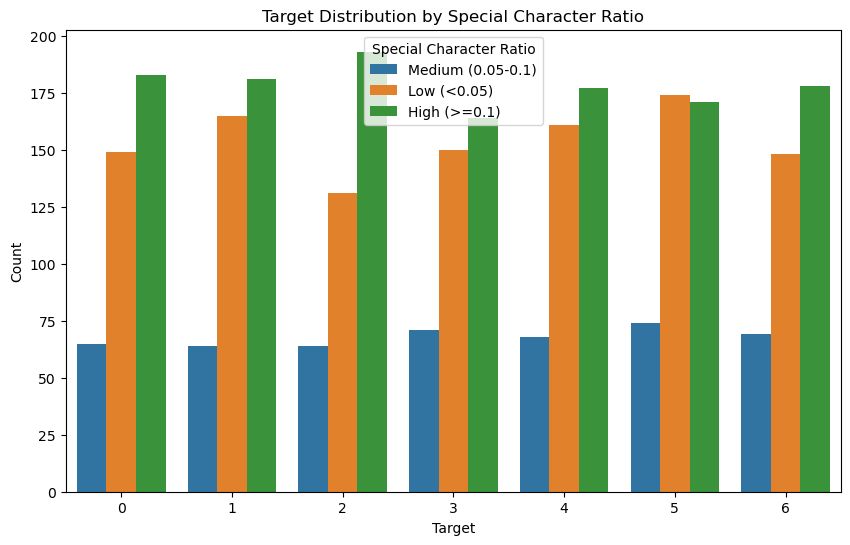

In [42]:


# 시각화
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='target', hue='special_char_category')
plt.title('Target Distribution by Special Character Ratio')
plt.xlabel('Target')
plt.ylabel('Count')
plt.legend(title='Special Character Ratio')
plt.show()
